In [ ]:
#This is a test

import math
import numpy as np
import matplotlib.pyplot as plt

# Constants in system (dont change)
E = 2.1e+11 # Youngs Modulus (Pa)
P = 7.4 # Force due to water acting on plate, in newtons
delta_max = 0.018 # in meters (distance plate moves over)
σmax = 5.25e+8

# Variables in system (feel free to change to gain insight)
width = 0.01 # Width in meters
t = 0.02 # thickness of spring in inches

def inertia(width,thickness):
  """
  Parameters: width (m) and thickness of spring (in)
    **Function converts inches to meters)
  Return: Inertia of Spring
  """
  inertia = ((width)*(thickness*0.0254)**3)/12
  return inertia

def length(inertia, youngs, distance, force):
  """
  Parameters: young's modulus (Pa), distance plate moves over (m), and
    force due to water on plate (N)
  Return: Length of spring(m)
  """
  length = ((3*inertia*youngs*distance)/force)**(1/3)
  return length

def max_angle(distance, length):
  """
  Parameters: distance plate moves over (m) and length of spring (m)
    force due to water on plate (N)
  Return: Max Angle of Deflection (Degrees)
  """
  angle = np.rad2deg(math.atan(distance/length))
  return angle

def stress(force, length, width, thickness):
  """
  Parameters: length of spring (m), distance plate moves over (M),
    force due to water on plate (N), thickness of spring (in)
     **Function converts inches to meters)
  Return: Stress (Pa)
  """
  stress = 6*force*length/(width*(thickness*0.0254)**2)
  return stress

def shear_stress(load: float, width: float, thickness: float):
  """
  Returns shear stress along the neutral axis of the beam in pascals.
  """
  return (3*load)/(2*width*thickness)

print("Inertia = ", inertia(width,t))
print("Length (cm) =", 100*length(inertia(width,t),E,delta_max,P))
print("Max Angle (°) =", max_angle(delta_max, length(inertia(width,t),E,delta_max,P)))
#print ("deform angle is (deg) =",np.rad2deg(deform_angle))
print('Stress (Pa) =', f"{stress(P,length(inertia(width,t),E,delta_max,P),width,t):e}")
print('Max Stress =', f"{σmax:e}")

Inertia =  1.0924709333333333e-13
Length (cm) = 5.511422969615216
Max Angle (°) = 18.086749102626477
Stress (Pa) = 9.482422e+08
Max Stress = 5.250000e+08


 Thickness (in)     Inertia       Length (cm)     Max Angle (°)     Stress (Pa), "*" Denotes Larger than σmax
--------------------------------------------------------------------------------------------------------------
     0.020        1.09247e-13       5.511          18.087          9.48242e+08*
     0.025        2.13373e-13       6.889          14.643          7.58594e+08*
     0.032        4.47476e-13       8.818          11.537          5.92651e+08*
     0.035        5.85496e-13       9.645          10.571          5.41853e+08*
     0.050        1.70699e-12      13.779           7.443          3.79297e+08
     0.062        3.25458e-12      17.085           6.014          3.05885e+08
     0.078        6.48043e-12      21.495           4.787          2.43139e+08
     0.094        1.13424e-11      25.904           3.975          2.01754e+08
     0.125        2.66717e-11      34.446           2.991          1.51719e+08


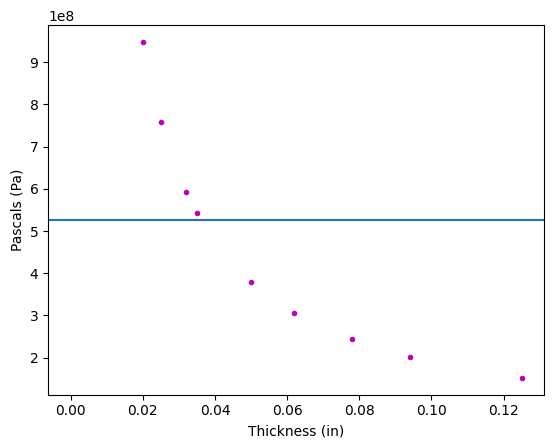

In [ ]:
# Calculations of Inertia, Desired Length of Spring, Max Angle, and Stress based on Thickness
thickness = [0.02,0.025, 0.032, 0.035, 0.05, 0.062, 0.078, 0.094, 0.125] # in inches
print(' Thickness (in)' + ' '*5 + 'Inertia' + ' '*7 + 'Length (cm)' + ' '*5 + 'Max Angle (°)' + ' '*5 + 'Stress (Pa), "*" Denotes Larger than σmax')
print('-'*110)

for k in range(len(thickness)):
  Inertia = inertia(width,thickness[k])
  Length = 100*length(Inertia,E,delta_max,P)
  Angle = max_angle(delta_max, length(Inertia,E,delta_max,P))
  Stress = stress(P,length(Inertia,E,delta_max,P),width,thickness[k])
  output = f'{thickness[k]:10.3f} {Inertia:18.5e} {Length:11.3f} {Angle:15.3f} {Stress:20.5e}'
  plt.plot(thickness[k], Stress, 'm.')
  if (Stress>σmax):
    output = output + '*'
    # utput = output + f'{findwidth(P, thickness[k], E, delta_max):10.4f}'
  print(output)

plt.xlabel('Thickness (in)')
plt.ylabel('Pascals (Pa)')
plt.axline((0,σmax),(0.12,σmax))
plt.show()

Text(0.5, 0.92, 'Plot of Stress as a function of Thickness and Width')

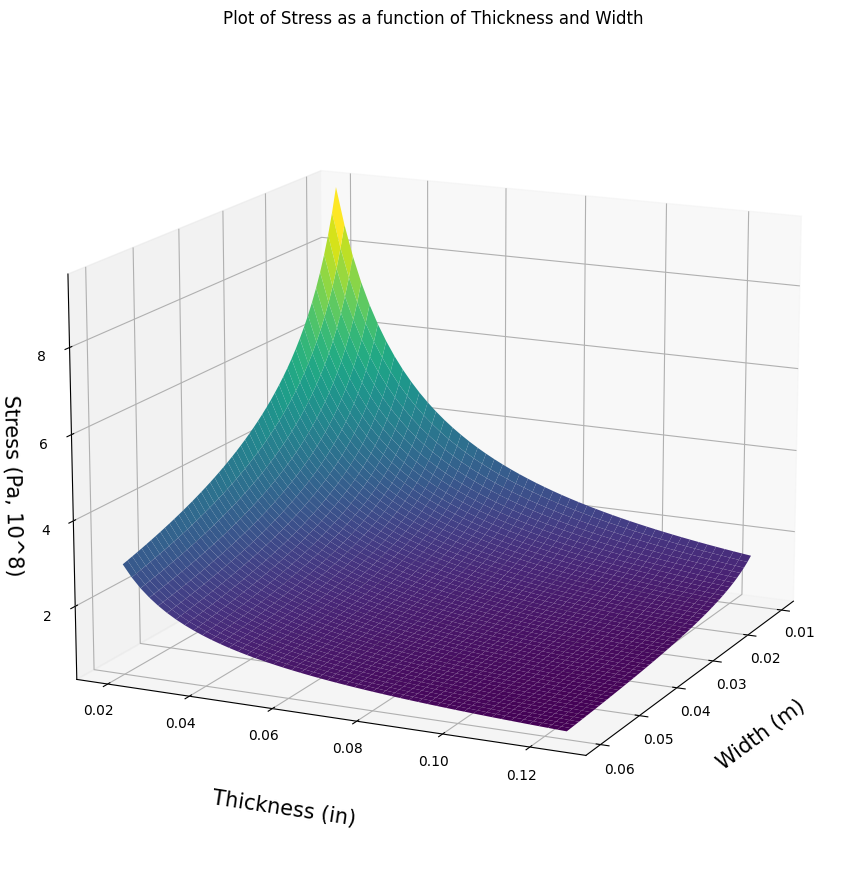

In [ ]:
#Graphing Stress as a Function of Thickness and Width
x = np.linspace(0.01, 0.06, 50)
y = np.linspace(0.02, 0.125, 50)

#Define Points
X, Y = np.meshgrid(x, y)
Z = stress(P,length(inertia(X,Y),E,delta_max,P),X, Y)
J = σmax + (X*Y*0)

#Define Axes
fig = plt.figure(figsize = (11,11))
ax = plt.axes(projection ='3d')

#Angle of View
ax.view_init(15,25)

#Plot
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#ax.plot_surface(X, Y, J, rstride=1, cstride=1,
                #cmap='autumn', edgecolor='none')

ax.set_ylabel('Thickness (in)', fontsize=15, rotation=60, labelpad=30)
ax.set_xlabel('Width (m)',fontsize=15, rotation=60, labelpad=20)
ax.set_zlabel('Stress (Pa, 10^8)',fontsize=15)
ax.set_title('Plot of Stress as a function of Thickness and Width')

Text(0.5, 0.92, 'Plot of Length of Spring as a function of Thickness and Width')

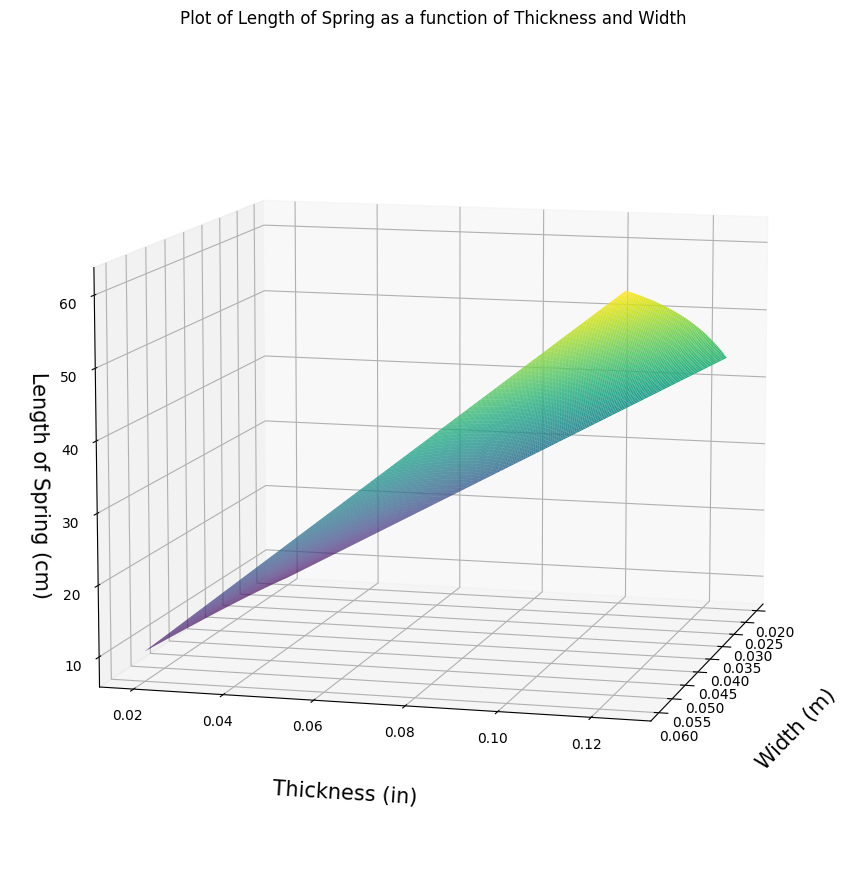

In [ ]:
#Graphing Length as a Function of Thickness and Width
precision = 100
minlength = 30 #Cm

width = np.linspace(0.02, 0.06, precision)
thickness = np.linspace(0.02, 0.125, precision)

x = np.linspace(0.01, 0.07, 50)
y = np.linspace(0.02, 0.13, 50)

#Define Points
X, Y = np.meshgrid(width, thickness)
I, J = np.meshgrid(x,y)
Z = 100*length(inertia(X,Y),E,delta_max,P)
K = 30 + (I*J*0)

#Define Axes
fig = plt.figure(figsize = (11,11))
ax = plt.axes(projection ='3d')

#Angle of View
ax.view_init(10,15)

#Plot
#ax.plot_surface(I, J, K, rstride=1, cstride=1,
                #cmap='autumn', edgecolor='none')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_ylabel('Thickness (in)', fontsize=15, rotation=60, labelpad=30)
ax.set_xlabel('Width (m)', fontsize=15, rotation=60, labelpad=30)
ax.set_zlabel('Length of Spring (cm)', fontsize = 15)
ax.set_title('Plot of Length of Spring as a function of Thickness and Width')